In [2]:
# Importing the libraries
import matplotlib.pyplot as plt
import numpy as np

from uncertainties import *
from uncertainties.unumpy import *
from uncertainties.umath import *

In [3]:
# Parameters of the HD30614 (alf Cam) 
# by Lamers (1993)
M = 43 # Solar masses

v_esc = 640 # km/s
v_inf = ufloat(1550, 60)
v_rel = v_inf/v_esc

print(f"v_rel = {v_rel}")

T_eff = 30.9 * 10**3 # K

Gamma = 0.32 # ratio between the gravitational acceleration and the radiative acceleration

# by Markova (2004)
L = 10**(5.71) # Luminosity of the star in Lsun 
R = 24.9 # Solar radiuses

# by Giess (1987)
L_ra = 10**(5.51) # Luminosity (runaway)
R_ra = 19.2 # Radius (runaway)

v_rel = 2.42+/-0.09


In [4]:
# Calculations done by Vink, J. S. et al. (2000) 
M_dot = 10**(-ufloat(6.6927,0.061) + ufloat(2.194,0.021) * log(L/1e5, 10) - ufloat(1.313,0.046) * log(M/30, 10) - ufloat(1.226,0.037) * log(v_rel/2) + ufloat(0.933,0.064) * log(T_eff/40000, 10) - ufloat(10.92,0.9) * log(T_eff/40000, 10)**2)

M_dot_ra = 10**(-ufloat(6.6927,0.061) + ufloat(2.194,0.021) * log(L_ra/1e5, 10) - ufloat(1.313,0.046) * log(M, 10) - ufloat(1.226,0.037) * log(v_rel/2) + ufloat(0.933,0.064) * log(T_eff/40000, 10) - ufloat(10.92,0.9) * log(T_eff/40000, 10)**2)

print(f"Mass Loss Rate (Vink 2000): {M_dot:.2e} Msun/yr")
print(f"Mass Loss Rate (Vink 2000 + Giess 1987): {M_dot_ra:.2e} Msun/yr")

# Calculations done by Vink, J. S. et al. (2000) for bi-stability jump 
rho = 10**(-ufloat(14.94,0.54) + ufloat(3.2,2.2) * Gamma) # g/cm^3

M_dot_bi = rho * 8 * np.pi * R**2 * v_inf

M_dot_bi_ra = rho * 8 * np.pi * R_ra**2 * v_inf

print(f"\nCharacteristic wind dencity: {rho:.2e} g/cm^3")
print(f"\nMass Loss Rate (Vink 2000 Bi-Stability Jump): {M_dot_bi:.2e} Msun/yr")
print(f"Mass Loss Rate (Vink 2000 Bi-Stability Jump + Giess 1987): {M_dot_bi_ra:.2e} Msun/yr")

Mass Loss Rate (Vink 2000): (1.53+/-0.28)e-06 Msun/yr
Mass Loss Rate (Vink 2000 + Giess 1987): (6.38+/-1.61)e-09 Msun/yr

Characteristic wind dencity: (1.21+/-2.48)e-14 g/cm^3

Mass Loss Rate (Vink 2000 Bi-Stability Jump): (2.93+/-5.99)e-07 Msun/yr
Mass Loss Rate (Vink 2000 Bi-Stability Jump + Giess 1987): (1.74+/-3.56)e-07 Msun/yr


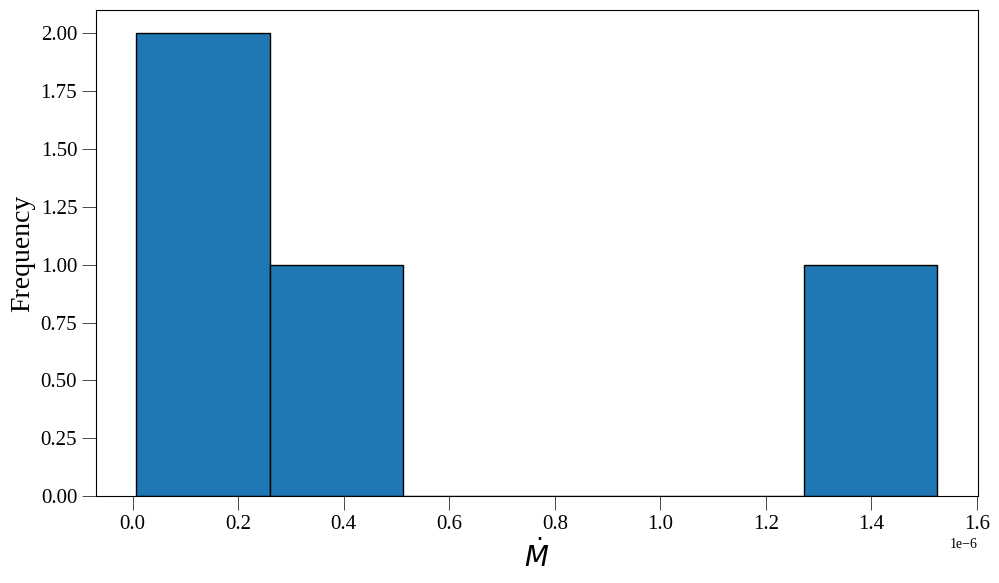

In [6]:
M_values = [M_dot.nominal_value, M_dot_ra.nominal_value, M_dot_bi.nominal_value, M_dot_bi_ra.nominal_value]

plt.rc("font", size=10)
plt.rcParams['font.family'] = 'Liberation Serif'

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xlabel(r'$\dot{M}$')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Frequency')
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=15)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=15)
plt.tight_layout()  

ax.hist(M_values, bins=6, edgecolor='black')

plt.savefig('images/hist.png')
plt.show()